In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
from libra_py import units
from libra_py import QE_methods
from libra_py import normal_modes
from libra_py import fit


import run

import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

In [2]:
rnd = Random()       

# Physical parameters
#T_vals = [1.0, 10.0, 25.0, 50.0, 100.0, 150.0, 250.0, 300.0, 350.0, 400.0]
T_vals = [50.0, 100.0, 150.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0]
Ea = 300.0 * units.kB 

# Lattice 
a = 2.0
tv1 = VECTOR(a,  0.0, 0.0)
tv2 = VECTOR(0.0,  a, 0.0)
tv3 = VECTOR(0.0,0.0,   a)

# Simulation parameters
nsteps = 100
nat = 100

model1 = {"model":1, "a":tv1, "b":tv2, "c":tv3, "Ea":Ea}
model2 = {"model":2, "a":tv1, "b":tv2, "c":tv3, "Ea":Ea, "diam":5.0*math.sqrt(2.0)*a, "Ea2":0.1*Ea }

model = model2

In [3]:
T = 300.0
time, msd, D = run.run_diffusion(T, rnd, model, nsteps, nat)

sz = len(time)
ln_time, ln_msd = [], []
for i in xrange(1, sz):
    ln_time.append(math.log(time[i]))
    ln_msd.append(math.log(msd[i]))

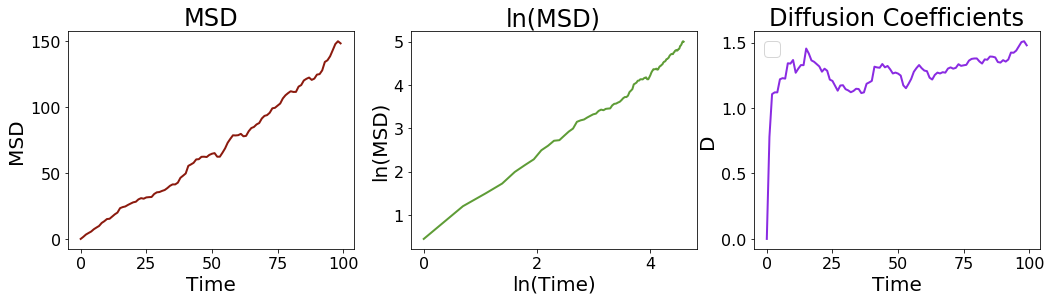

In [4]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,3,1)
plt.title('MSD')
plt.xlabel('Time')
plt.ylabel('MSD')
plt.plot(time, msd, label='', linewidth=2, color = colors["11"]) 

plt.subplot(1,3,2)
plt.title('ln(MSD)')
plt.xlabel('ln(Time)')
plt.ylabel('ln(MSD)')
plt.plot(ln_time, ln_msd, label='', linewidth=2, color = colors["21"]) 


plt.subplot(1,3,3)
plt.title('Diffusion Coefficients')
plt.xlabel('Time')
plt.ylabel('D')
plt.plot(time, D, label='', linewidth=2, color = colors["31"]) 

plt.legend()
plt.show()
plt.close()

In [5]:
lnDT, alphaT =  run.run_T_scan(T_vals, rnd, model, nsteps, nat)    

In [6]:
print lnDT, alphaT

[-5.432562979344419, -1.7871172444955057, -0.3624907927293191, 0.024931455294527248, 0.3863486949825129, 0.5063629233649662, 0.5851341615787629, 0.9024073650614453, 0.9072377525188176, 0.9267533234669586, 0.8105695869196219, 0.7797587889753911, 1.1128259932774764, 1.0603583695859031, 1.0218888192529962] [1.2525633110887329, 1.0246379949991158, 0.9426055969731594, 1.0389042312461123, 1.0121203168222372, 1.026102203155004, 1.0181051422917047, 0.940555264369231, 0.9633680529870342, 0.9813825296202092, 1.0132211246916778, 1.0338792087257296, 0.9667326108851897, 0.9661855347283647, 1.0116274027342815]


In [7]:
reciT, lnD = [], []
nTemp = len(T_vals)

for i in xrange(nTemp):
    if lnDT[i]!=None:
        reciT.append(1.0/T_vals[i])
        lnD.append(lnDT[i])

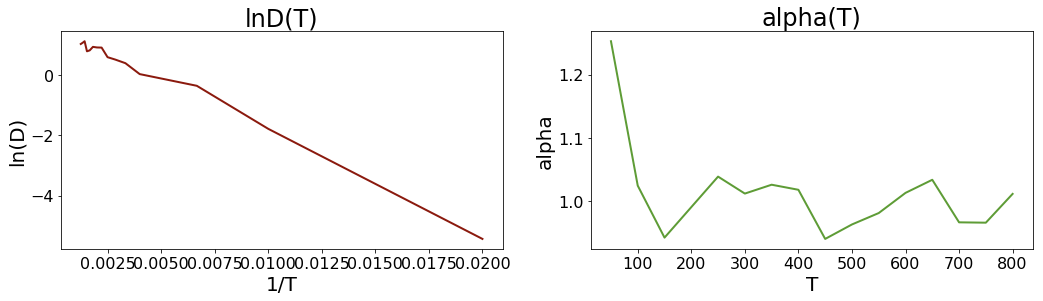

In [8]:
plt.figure(1, figsize=(18, 4)) # dpi=300, frameon=False)
plt.subplot(1,2,1)
plt.title('lnD(T)')
plt.xlabel('1/T')
plt.ylabel('ln(D)')
plt.plot(reciT, lnD, label='', linewidth=2, color = colors["11"]) 

plt.subplot(1,2,2)
plt.title('alpha(T)')
plt.xlabel('T')
plt.ylabel('alpha')
plt.plot(T_vals, alphaT, label='', linewidth=2, color = colors["21"]) 

In [9]:
lnD0, Eact = fit.Regression(reciT, lnD, 1)  

print "Site hopping activation energy = ", Ea
print "Computed activation energy = ", -Eact*units.kB
dim = 2
print "Dimensionality = ", dim
D = math.exp(lnD0)
print "Computed diffusion coefficient (D_true * 2 * dim) = ", D
D_true = D / (2.0*dim)
#print "Expected true diffusion coefficient, D_true = ", D_true
print "Expected diffusion coefficient, from random walk", a*a  # dt = 1.0

Site hopping activation energy =  0.000950044545375
Computed activation energy =  0.00107874182578
Dimensionality =  2
Computed diffusion coefficient (D_true * 2 * dim) =  4.5635144015
Expected diffusion coefficient, from random walk 4.0
